<a href="https://colab.research.google.com/github/89CANDY89/BOOTCAMP-2-ALURA/blob/main/MODULO%201/AULA_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BootCamp Data Science Aplicada Alura Módulo 01


## Aula 05 - Manipulação e Interpretação dos Gráficos


In [ ]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sb

In [ ]:
dados = pd.read_csv("https://raw.githubusercontent.com/89CANDY89/BOOTCAMP-2-ALURA/main/dados/A120703189_28_143_208.csv", encoding='ISO-8859-1', skiprows=3, sep = ';', skipfooter=12, thousands='.', decimal=',', engine='python')

In [ ]:
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09


In [ ]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
# usaveis = usaveis.drop("Total", axis=1)
# usaveis["Total"] = usaveis.sum(axis=1)
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
ordenado_por_total = ordenado_por_total / 10**6

In [ ]:
mes_mais_recente = ordenado_por_total.columns[-1]
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo            177.408318
31 Minas Gerais          79.780838
41 Paraná                43.480729
43 Rio Grande do Sul     37.798833
33 Rio de Janeiro        49.149884
Name: 2021/Mar, dtype: float64

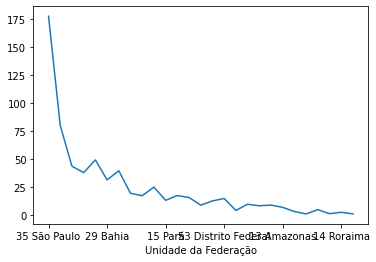

In [ ]:
gastos_do_mais_recente.plot()

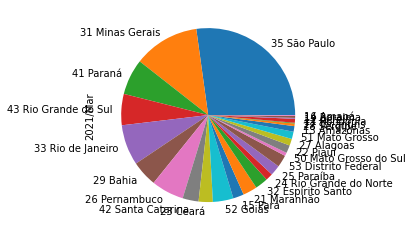

In [ ]:
gastos_do_mais_recente.plot(kind='pie')

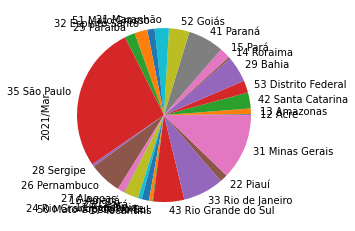

In [ ]:
gastos_do_mais_recente.sample(frac=1).plot(kind='pie')

In [ ]:
gastos_do_mais_recente / gastos_do_mais_recente.loc["33 Rio de Janeiro"]

Unidade da Federação
35 São Paulo              3.609537
31 Minas Gerais           1.623215
41 Paraná                 0.884656
43 Rio Grande do Sul      0.769052
33 Rio de Janeiro         1.000000
29 Bahia                  0.637125
26 Pernambuco             0.803109
42 Santa Catarina         0.394219
23 Ceará                  0.349404
52 Goiás                  0.505942
15 Pará                   0.265912
21 Maranhão               0.351873
32 Espírito Santo         0.317526
24 Rio Grande do Norte    0.177690
25 Paraíba                0.254688
53 Distrito Federal       0.299735
50 Mato Grosso do Sul     0.082116
22 Piauí                  0.194144
27 Alagoas                0.166448
51 Mato Grosso            0.179774
13 Amazonas               0.138333
28 Sergipe                0.062687
17 Tocantins              0.018896
11 Rondônia               0.096286
12 Acre                   0.023140
14 Roraima                0.048461
16 Amapá                  0.020125
Name: 2021/Mar, dtype: float64

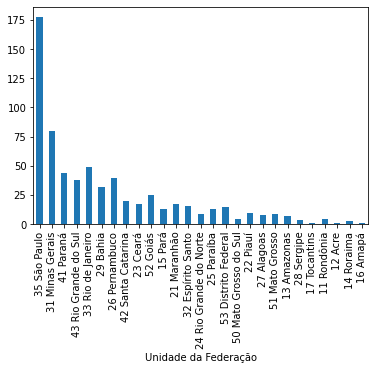

In [ ]:
gastos_do_mais_recente.plot(kind='bar')

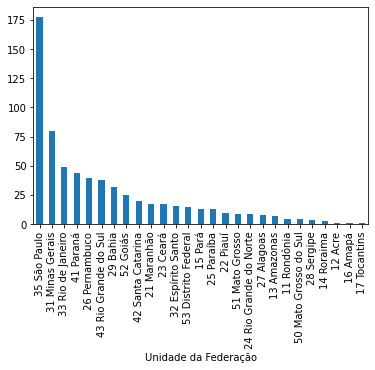

In [ ]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente.plot(kind='bar')

### DESAFIO 1: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

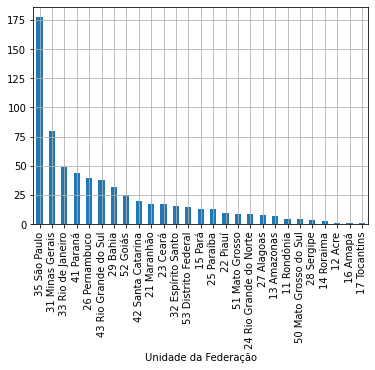

In [ ]:
gastos_do_mais_recente.plot(kind='bar', grid=True)
plt.show()

### Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

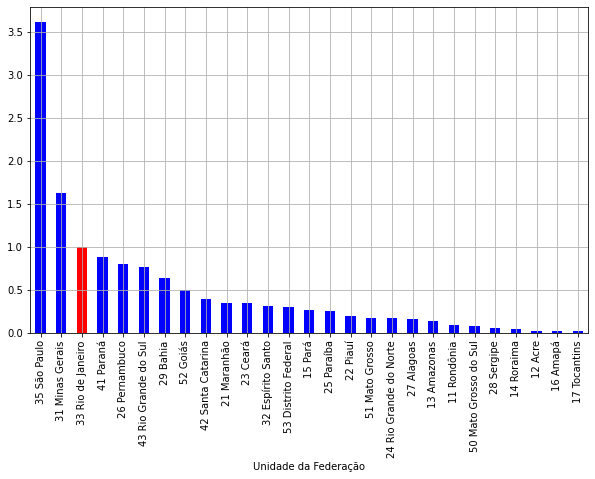

In [ ]:
label_estado_ref_02 = "33 Rio de Janeiro"
desafio_02 = gastos_do_mais_recente / gastos_do_mais_recente.loc[label_estado_ref_02]
estado_ref = gastos_do_mais_recente.index.get_loc(label_estado_ref_02)
label_colors_02 = ['b']*27
label_colors_02[estado_ref] = 'r'
desafio_02.plot(kind='bar', grid=True, color=label_colors_02, figsize=(10,6))

### Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.
Fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [ ]:
url_pop = 'https://github.com/89CANDY89/BOOTCAMP-2-ALURA/blob/main/dados/Tabela%206579.xlsx?raw=True'
pop = pd.read_excel(io=url_pop, header=3, skipfooter=1)

pop.rename(columns={'Unnamed: 0':'Ano'}, inplace=True)

Para o ano de 2010, o valor é igual á média aritmética entre os valores de 2009 e 2010.
O valor populacional é sempre o valor de julho do ano referente.
Além disso, vamos transformar nossos dados para a ordem de milhões de habitantes.

In [ ]:
pop.set_index('Ano',inplace=True)
pop.head()

,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Ano,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,1493565,680075,3341094,412783,7321490,613166,1280513,6305537,3111881,8450528,3106436,3742604,8734196,3127560,1999374,14502563,19850060,3453646,15872362,41011638,10590171,6052587,10855228,2336060,2957735,5844995,2557159
2009,1503928,691132,3393369,421499,7431020,626609,1292051,6367138,3145325,8547809,3137541,3769977,8810256,3156108,2019679,14637364,20033665,3487199,16010429,41384039,10686247,6118743,10914128,2360498,3001692,5926300,2606885
2011,1576455,746386,3538387,460165,7688593,684309,1400892,6645761,3140328,8530155,3198657,3791315,8864906,3143384,2089819,14097534,19728701,3547055,16112678,41587182,10512349,6317054,10733030,2477542,3075936,6080716,2609998
2012,1590011,758786,3590985,469524,7777543,698602,1417694,6714314,3160748,8606005,3228198,3815171,8931028,3165472,2110867,14175341,19855332,3578067,16231365,41901219,10577755,6362734,10768025,2500365,3115336,6154996,2648532
2013,1728214,776463,3807921,488072,7969654,734996,1478164,6794301,3184166,8778576,3373959,3914421,9208550,3300935,2195662,15044137,20593356,3839366,16369179,43663669,10997465,6634254,11164043,2587269,3182113,6434048,2789761


In [ ]:
temp = (pop.T /1000000).round(2)
temp[2010] = ((temp[2009] + temp[2011]) / 2).round(2)
pop = temp.T.sort_index()
pop.head()

,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Ano,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,1.49,0.68,3.34,0.41,7.32,0.61,1.28,6.31,3.11,8.45,3.11,3.74,8.73,3.13,2.00,14.50,19.85,3.45,15.87,41.01,10.59,6.05,10.86,2.34,2.96,5.84,2.56
2009,1.50,0.69,3.39,0.42,7.43,0.63,1.29,6.37,3.15,8.55,3.14,3.77,8.81,3.16,2.02,14.64,20.03,3.49,16.01,41.38,10.69,6.12,10.91,2.36,3.00,5.93,2.61
2010,1.54,0.72,3.46,0.44,7.56,0.66,1.34,6.51,3.14,8.54,3.17,3.78,8.84,3.15,2.05,14.37,19.88,3.52,16.06,41.48,10.60,6.22,10.82,2.42,3.04,6.00,2.61
2011,1.58,0.75,3.54,0.46,7.69,0.68,1.40,6.65,3.14,8.53,3.20,3.79,8.86,3.14,2.09,14.10,19.73,3.55,16.11,41.59,10.51,6.32,10.73,2.48,3.08,6.08,2.61
2012,1.59,0.76,3.59,0.47,7.78,0.70,1.42,6.71,3.16,8.61,3.23,3.82,8.93,3.17,2.11,14.18,19.86,3.58,16.23,41.90,10.58,6.36,10.77,2.50,3.12,6.15,2.65


In [ ]:
pop.index = [str(ano) + '/Jul' for ano in pop.index]
pop.head()

,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2008/Jul,1.49,0.68,3.34,0.41,7.32,0.61,1.28,6.31,3.11,8.45,3.11,3.74,8.73,3.13,2.00,14.50,19.85,3.45,15.87,41.01,10.59,6.05,10.86,2.34,2.96,5.84,2.56
2009/Jul,1.50,0.69,3.39,0.42,7.43,0.63,1.29,6.37,3.15,8.55,3.14,3.77,8.81,3.16,2.02,14.64,20.03,3.49,16.01,41.38,10.69,6.12,10.91,2.36,3.00,5.93,2.61
2010/Jul,1.54,0.72,3.46,0.44,7.56,0.66,1.34,6.51,3.14,8.54,3.17,3.78,8.84,3.15,2.05,14.37,19.88,3.52,16.06,41.48,10.60,6.22,10.82,2.42,3.04,6.00,2.61
2011/Jul,1.58,0.75,3.54,0.46,7.69,0.68,1.40,6.65,3.14,8.53,3.20,3.79,8.86,3.14,2.09,14.10,19.73,3.55,16.11,41.59,10.51,6.32,10.73,2.48,3.08,6.08,2.61
2012/Jul,1.59,0.76,3.59,0.47,7.78,0.70,1.42,6.71,3.16,8.61,3.23,3.82,8.93,3.17,2.11,14.18,19.86,3.58,16.23,41.90,10.58,6.36,10.77,2.50,3.12,6.15,2.65


dados de gasto do SUS, e alterar o nome do DataFrame para facilitar o trabalho.

In [ ]:
ordenado_por_total.index = ordenado_por_total.index.str[3:]
gasto_sus = ordenado_por_total.T
gasto_sus.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.962000,70.301090,48.855046,45.897705,44.128160,33.410124,26.222079,24.409573,27.643305,18.149374,20.126081,13.452264,10.032886,9.110109,10.871590,10.215957,8.279289,9.711680,8.112220,7.929895,7.934652,4.636851,5.051932,1.940793,1.743979,0.771688,1.275064
2008/Mar,170.556696,79.119006,55.611791,52.928696,42.900847,41.316673,30.716362,27.483480,30.085370,20.992213,22.149376,14.750895,12.262049,10.126627,12.348758,11.627918,9.793889,10.428191,9.210506,9.416368,8.641517,5.017838,5.200152,1.955722,2.057439,0.876091,1.177746
2008/Abr,170.338163,79.046322,56.115136,51.972417,45.306500,42.826994,30.589333,27.806641,31.376221,21.049477,23.436683,15.148647,12.453467,10.964235,12.680965,11.922015,8.997543,10.227943,10.466692,9.390588,8.531576,5.265951,5.343715,2.143354,2.057830,0.896953,1.396372
2008/Mai,172.462058,79.268070,55.574832,51.679351,43.951349,42.086263,31.420090,28.354280,31.189905,19.162547,23.861081,14.543680,11.789786,11.032871,13.258412,11.900817,9.842109,10.562149,9.844096,9.378197,9.079902,5.367095,5.344488,2.280383,2.226578,1.027289,1.411521
2008/Jun,175.492996,79.619189,56.094755,53.759674,44.111107,39.910042,28.947511,28.993293,29.463965,20.362997,23.502916,14.553978,11.889687,10.450599,12.246686,11.969272,10.257782,10.465089,10.299459,9.450301,8.646296,4.981036,5.398413,2.624543,2.112577,0.938294,1.420892


Agora, vamos selecionar nosso gasto_sus apenas no período que temos dados populacionais.

In [ ]:
gasto_sus = gasto_sus.iloc[5:-3,:]
gasto_sus.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Jul,179.569910,82.209207,59.802402,56.391648,44.359057,57.664561,30.985516,30.049456,30.302692,20.022472,22.544291,14.536700,12.205584,11.119054,13.090843,11.299443,10.167827,10.618080,9.385440,9.789875,8.755807,4.928823,5.061462,2.973421,2.029128,1.004340,1.367235
2008/Ago,180.005050,80.374117,56.699001,56.233759,42.500830,43.254543,31.705297,28.887855,29.304822,21.054991,23.259148,14.609873,12.384068,10.812840,12.673774,11.548452,9.602843,10.645918,9.262768,8.987812,8.331764,4.543253,5.213290,2.938286,1.886872,1.045291,1.550341
2008/Set,180.151656,82.409129,58.091986,57.910171,43.066461,42.851268,30.703879,30.725719,30.435027,21.410602,23.667690,15.317882,12.486953,11.258682,12.790639,12.422578,10.272467,11.037941,9.228202,8.843062,8.148090,4.525677,5.201401,2.843931,2.084885,1.003741,1.550167
2008/Out,191.859884,88.613477,61.365941,59.592125,44.553315,43.332574,31.165075,31.274396,31.741383,20.610542,23.352578,15.617700,12.846258,10.572191,12.727661,12.419977,10.814112,11.143376,9.464598,9.237299,7.681661,4.566052,6.013071,2.878153,2.230838,1.055063,1.635676
2008/Nov,190.927266,84.486996,59.667209,57.565742,41.351512,40.946909,30.889234,29.998636,30.415960,19.940726,23.537613,15.643974,12.885678,10.164721,12.458082,12.302699,10.371655,10.583050,9.578540,9.459193,7.761445,4.716242,5.205114,2.780023,2.122013,1.223201,1.647903


Agora, vamos filtrar o gasto_sus conforme os dados de pop. Assim conseguiremos plotar os dados compartilhando o eixo X.

In [ ]:
gasto_sus = gasto_sus.loc[pop.index.to_list()]
gasto_sus.index

Index(['2008/Jul', '2009/Jul', '2010/Jul', '2011/Jul', '2012/Jul', '2013/Jul',
       '2014/Jul', '2015/Jul', '2016/Jul', '2017/Jul', '2018/Jul', '2019/Jul',
       '2020/Jul'],
      dtype='object')

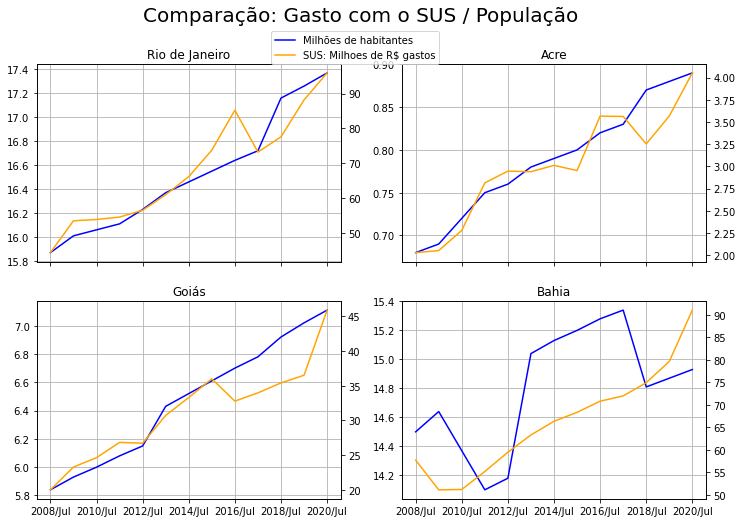

In [ ]:
import matplotlib.lines as mlines
ufs = ['Rio de Janeiro', 'Goiás', 'Acre','Bahia']

fig, axs = plt.subplots(2,2, figsize=(12,8))

for i in range(len(ufs)):
  if i <= 1:
    p1 = i
    p2 = 0
  else:
    p1 = i - 2 
    p2 = 1
  pop[ufs[i]].plot(ax=axs[p1,p2], grid=True, color='blue')
  gasto_sus[ufs[i]].plot(ax=axs[p1,p2], secondary_y=True, grid=True, color='orange')
  axs[p1,p2].set_title(ufs[i])

blue_line = mlines.Line2D([], [], color='blue', label='Milhões de habitantes')
orange_line = mlines.Line2D([], [], color='orange', label='SUS: Milhoes de R$ gastos')
plt.legend(handles=[blue_line,orange_line], bbox_to_anchor=(0.14,2.39))

plt.suptitle('Comparação: Gasto com o SUS / População', fontsize=20)

plt.show()

In [ ]:
gasto_sus_pop = gasto_sus/pop
gasto_sus_pop = gasto_sus_pop[gasto_sus.columns] # Ordenando pelo custo absoluto
gasto_sus_pop.head() 

,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Jul,4.378686,4.141522,5.647063,5.192601,2.795152,3.976866,3.549315,4.966852,3.586117,3.428506,3.079821,2.303756,3.537850,3.575258,3.500225,4.413845,4.345225,3.414174,2.998543,3.307390,2.621499,2.464411,3.954267,1.995585,2.984012,2.449611,2.241370
2009/Jul,5.173498,4.995008,6.637864,6.337031,3.340766,3.488735,4.007523,6.264331,4.030386,3.928115,3.543978,2.829838,4.354900,4.195630,4.332164,5.539878,5.066393,4.089972,3.590354,3.886285,2.792056,3.031028,4.907360,2.480406,2.973747,3.264332,2.802749
2010/Jul,5.403995,5.199465,6.888097,6.476410,3.354540,3.559470,4.064551,6.201621,4.018789,4.107850,3.455735,3.114102,4.525425,4.249310,4.380251,5.383750,4.879715,3.753535,3.713793,4.011162,2.641675,3.248899,5.128806,3.008077,3.165495,4.266374,2.768839
2011/Jul,5.777572,5.580180,7.329356,6.601618,3.386682,3.910969,4.897492,6.614785,4.124058,4.415291,3.335004,3.007023,4.917151,4.659902,3.871183,5.422329,5.317391,3.795881,3.944166,3.865881,2.817188,3.233793,4.780244,2.733853,3.752735,3.578603,2.580311
2012/Jul,5.831923,6.143638,7.894205,7.141778,3.482219,4.191383,5.237626,7.084138,4.173612,4.345568,3.073960,3.311033,5.553290,5.026102,4.203794,5.679185,5.756823,4.190222,4.054615,4.299166,3.066855,3.161191,5.147716,2.616538,3.877601,3.709708,2.869303


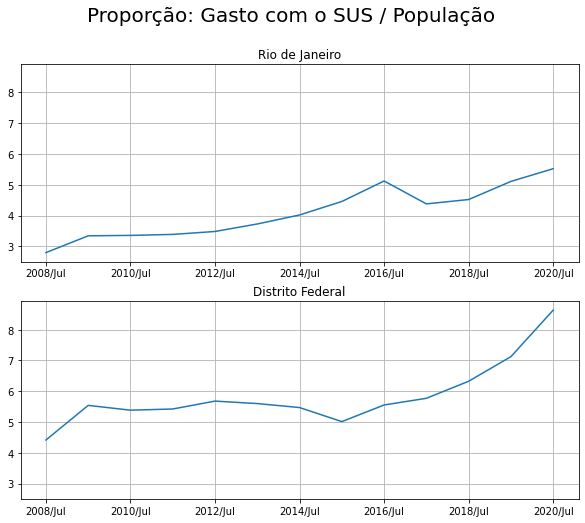

In [ ]:
fig, axs = plt.subplots(2, figsize=(10,8), sharey=True)
gasto_sus_pop['Rio de Janeiro'].plot(ax=axs[0], grid=True)
gasto_sus_pop['Distrito Federal'].plot(ax=axs[1], grid=True)
axs[0].set_title('Rio de Janeiro')
axs[1].set_title('Distrito Federal')

plt.suptitle('Proporção: Gasto com o SUS / População', fontsize=20 )

plt.show()

### *Desafio 4: Faça uma análise dos dados analisados, levante hipóteses*

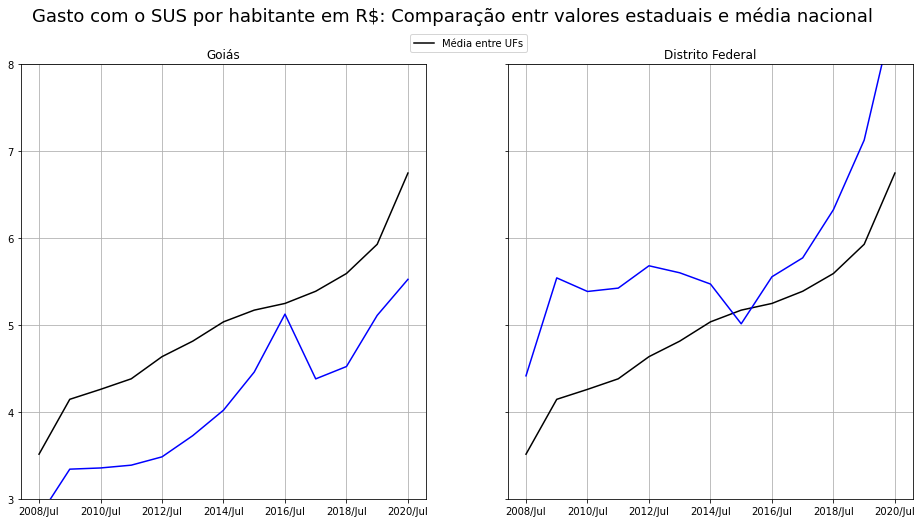

In [ ]:
fig, axs = plt.subplots(1,2, sharey=True, figsize=(16,8))

gasto_sus_pop.mean(axis=1).plot(grid=True, ax=axs[0], color='k')
gasto_sus_pop['Rio de Janeiro'].plot(grid=True, ax=axs[0], color='b')

gasto_sus_pop.mean(axis=1).plot(grid=True, ax=axs[1], color='k')
gasto_sus_pop['Distrito Federal'].plot(grid=True, ax=axs[1], color='b')

axs[0].set_title('Goiás')
axs[1].set_title('Distrito Federal')

black_line = mlines.Line2D([], [], color='k', label='Média entre UFs')
plt.legend(handles=[black_line], bbox_to_anchor=(0.06,1.08))

plt.ylim(3,8)
plt.suptitle('Gasto com o SUS por habitante em R$: Comparação entr valores estaduais e média nacional', fontsize=18)

plt.show()

### Desafio 5: Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.


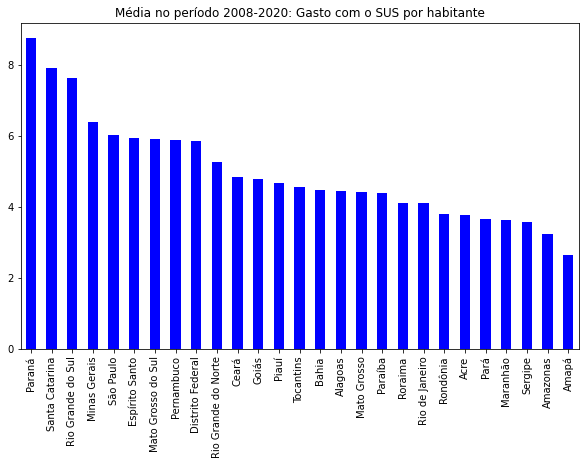

In [ ]:
gasto_sus_pop.mean().sort_values(ascending=False).plot(kind='bar', color='b', figsize=(10,6))
plt.title('Média no período 2008-2020: Gasto com o SUS por habitante')

plt.show()

Como esperado, as duas regiões mais ricas do país (sul e sudeste) encabeçaram a lista. Ao mesmo tempo, Nordeste e Norte são as duas regiões mais pobres. Entre eles, o Centro-Oeste está perdoado dos trocadilhos.

Identificamos que os três primeiros estados do ranking eram da região Sul. Logo depois, apareceram três estados do Sudeste e o Rio de Janeiro quebrou as regras.